In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [11]:
dataset = pd.read_csv('bankloans.csv')

In [13]:
dataset.head(7)

,Yash,Tehsil,Ish Tecrubesi,Gelir,Gelirxerc nisbeti,Kredit borcu,Diger borc,Gecikme
0,41,3,17,176,9.3,11.36,5.01,1.0
1,27,1,10,31,17.3,1.36,4.00,0.0
2,40,1,15,55,5.5,0.86,2.17,0.0
3,41,1,15,120,2.9,2.66,0.82,0.0
4,24,2,2,28,17.3,1.79,3.06,1.0
5,41,2,5,25,10.2,0.39,2.16,0.0
6,39,1,20,67,30.6,3.83,16.67,0.0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yash               1150 non-null   int64  
 1   Tehsil             1150 non-null   int64  
 2   Ish Tecrubesi      1150 non-null   int64  
 3   Gelir              1150 non-null   int64  
 4   Gelirxerc nisbeti  1150 non-null   float64
 5   Kredit borcu       1150 non-null   float64
 6   Diger borc         1150 non-null   float64
 7   Gecikme            700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 72.0 KB


In [21]:
print(dataset.isnull().sum())

Yash                   0
Tehsil                 0
Ish Tecrubesi          0
Gelir                  0
Gelirxerc nisbeti      0
Kredit borcu           0
Diger borc             0
Gecikme              450
dtype: int64


In [30]:
dataset['Gecikme'].fillna(0, inplace=True)

In [49]:
x = dataset

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [65]:
x_scaled

array([[0.58333333, 0.5       , 0.51515152, ..., 0.55231144, 0.14110953,
        1.        ],
       [0.19444444, 0.        , 0.3030303 , ..., 0.06569343, 0.11237553,
        0.        ],
       [0.55555556, 0.        , 0.45454545, ..., 0.04136253, 0.06031294,
        0.        ],
       ...,
       [0.77777778, 0.        , 0.39393939, ..., 0.03454988, 0.09473684,
        0.        ],
       [0.41666667, 0.25      , 0.03030303, ..., 0.01995134, 0.0398293 ,
        0.        ],
       [0.47222222, 0.        , 0.60606061, ..., 0.043309  , 0.12347084,
        0.        ]])

In [77]:
dataset['Risk Score (1-10)'] = np.mean(x_scaled, axis=1) * 10
dataset['Risk Score (1-10)'] = np.round(dataset['Risk Score (1-10)'])
print(dataset[['Risk Score (1-10)']].head(50))

    Risk Score (1-10)
0                 5.0
1                 1.0
2                 2.0
3                 2.0
4                 3.0
5                 2.0
6                 3.0
7                 1.0
8                 2.0
9                 1.0
10                0.0
11                1.0
12                3.0
13                2.0
14                3.0
15                3.0
16                3.0
17                2.0
18                1.0
19                1.0
20                2.0
21                2.0
22                1.0
23                1.0
24                2.0
25                2.0
26                2.0
27                3.0
28                2.0
29                2.0
30                1.0
31                1.0
32                1.0
33                1.0
34                1.0
35                2.0
36                2.0
37                2.0
38                3.0
39                2.0
40                1.0
41                2.0
42                2.0
43                2.0
44        

In [134]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5, random_state=0)
dataset['cluster'] = cluster.fit_predict(x_scaled)

In [136]:
dataset['cluster'].head(20)

0     2
1     3
2     1
3     1
4     2
5     1
6     0
7     1
8     2
9     3
10    3
11    3
12    0
13    1
14    0
15    2
16    2
17    0
18    1
19    4
Name: cluster, dtype: int32

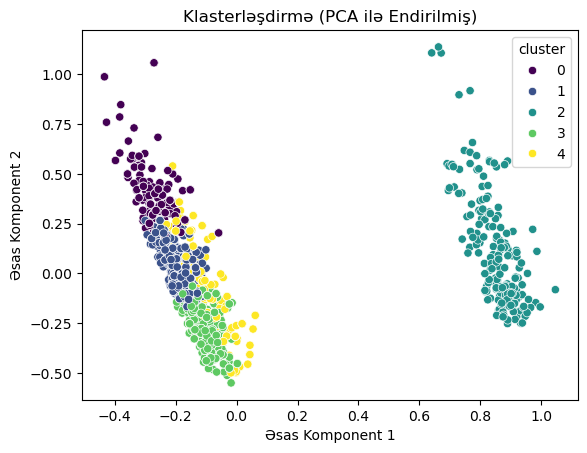

In [155]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)

sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=dataset['cluster'], palette='viridis')
plt.title('Klasterləşdirmə (PCA ilə Endirilmiş)')
plt.xlabel('Əsas Komponent 1')
plt.ylabel('Əsas Komponent 2')
plt.show()